In [1]:
import pydot
from collections import defaultdict 
from IPython.display import Image, display


In [2]:

def lstr(p):
        return ''.join([str(elem)  for elem in p])

In [5]:
def ModifiedBFSPreSols(s): 

        # Create dictionaries graph,visited and pydot graph G
        graph = defaultdict()
        visited = defaultdict()
        G = pydot.Dot(graph_type="digraph")
        
        # Create a queue for BFS 
        queue = [] 
  
        # Mark the source node as visited and enqueue it 
        queue.append(s) 
        visited[lstr(s)] = True
  
        while queue: 
  
            # Dequeue a vertex from queue 
            s = queue.pop(0) 
            graph[lstr(s)]=[]

            flag = False
            for i in range(len(s)-1):
                d = s[i+1::-1] + s[i+2:]
                if(d == sorted(d)):
                     flag = True
            if flag:
              node = pydot.Node(lstr(s),style="filled", fillcolor="yellow")
            else: 
              node = pydot.Node(lstr(s))

            G.add_node(node)
            
            # Get all adjacent vertices of the 
            # dequeued vertex s. If a adjacent 
            # has not been visited, then mark it 
            # visited and enqueue it 
            if(s != sorted(s)):
              for i in range(len(s)-1):
                for j in range(i+1,len(s)):
                    if i!=0:
                      d = s[:i] + s[j:i-1:-1] + s[j+1:]
                    else:
                      d = s[j::-1] + s[j+1:]
                if (d != s) and not(lstr(d) in visited.keys()):
                 
                  if(d != sorted(d)):
                     node = pydot.Node(lstr(d))
                  else:
                    node = pydot.Node(lstr(d),style="filled", fillcolor="green") # first sorted green
                  
                  G.add_node(node)
                  edge = pydot.Edge(lstr(s),lstr(d))
                  G.add_edge(edge)
                  graph[lstr(s)].append(lstr(d))
                  queue.append(d) 
                  visited[lstr(d)] = True 
              
        # Dsplay the pydot graph G
        im = Image(G.create_png())
        display(im)

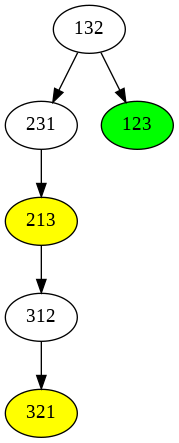

In [6]:
p = [1,3,2]
ModifiedBFSPreSols(p)